<a href="https://colab.research.google.com/github/machiwao/CCADMACL_PROJECT_COM222/blob/judiciary/CCADMACL_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensinal Poverty Measures
Dataset Reference: https://www.kaggle.com/datasets/grosvenpaul/family-income-and-expenditure/data


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Data Loading

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/machiwao/CCADMACL_PROJECT_COM222/refs/heads/main/Family%20Income%20and%20Expenditure.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [15]:
df.isna().sum()

,0
Total Household Income,0
Region,0
Total Food Expenditure,0
Main Source of Income,0
Agricultural Household indicator,0
Bread and Cereals Expenditure,0
Total Rice Expenditure,0
Meat Expenditure,0
Total Fish and marine products Expenditure,0
Fruit Expenditure,0


In [16]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [17]:
df['Region'].value_counts()

,count
Region,
IVA - CALABARZON,4162
NCR,4130
III - Central Luzon,3237
VI - Western Visayas,2851
VII - Central Visayas,2541
V - Bicol Region,2472
XI - Davao Region,2446
I - Ilocos Region,2348
VIII - Eastern Visayas,2337


In [18]:
# Extract Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns

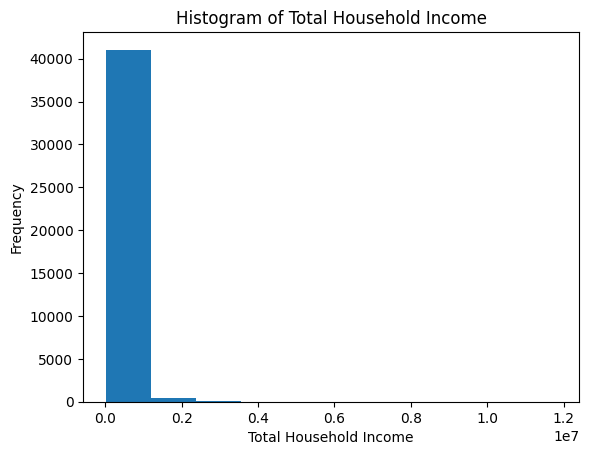

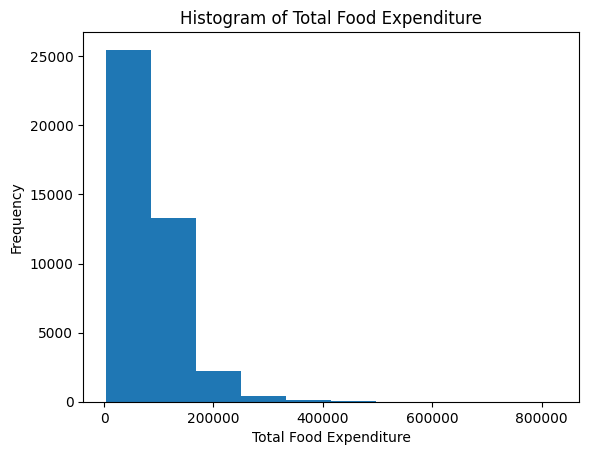

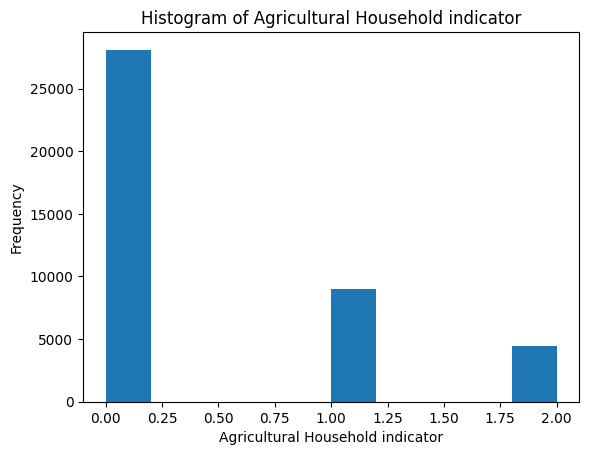

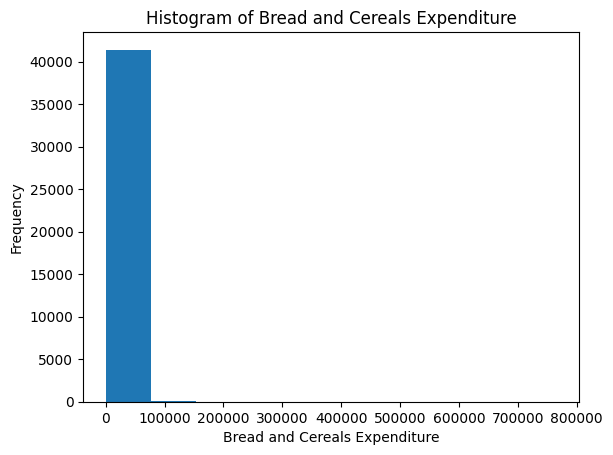

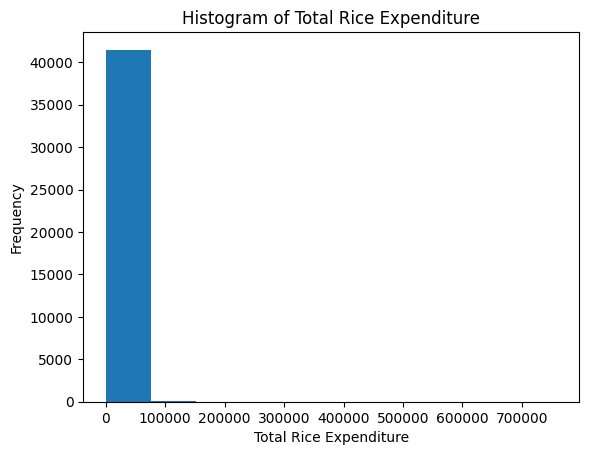

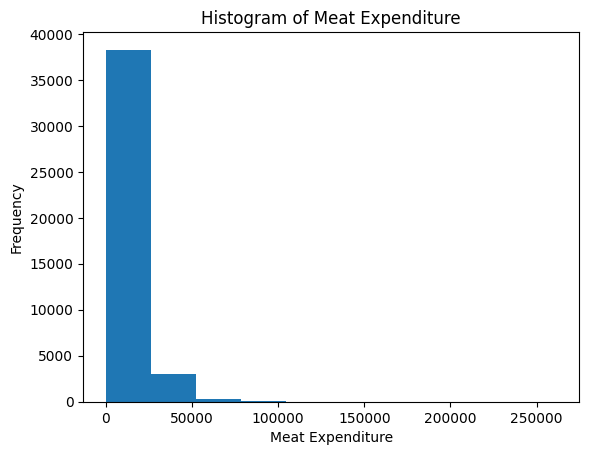

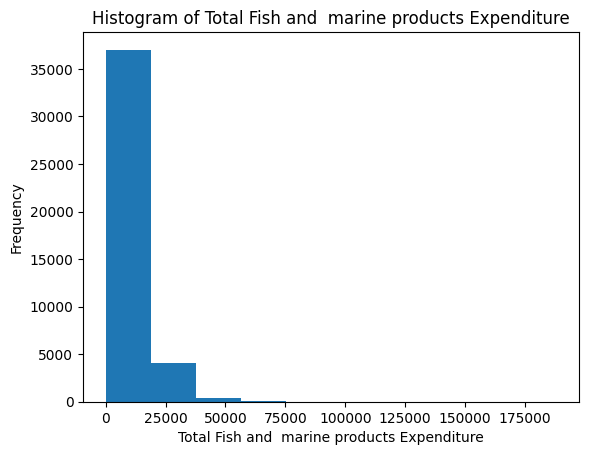

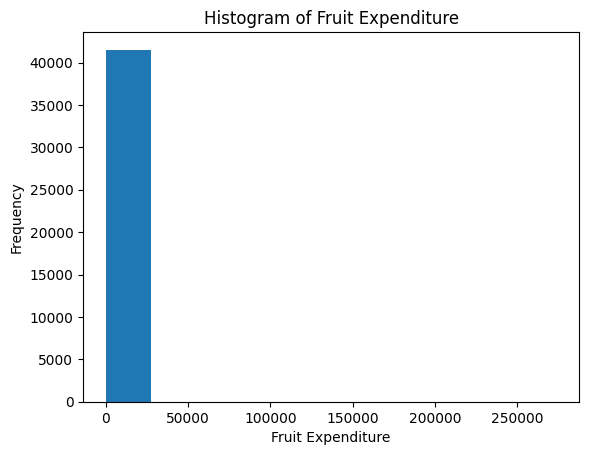

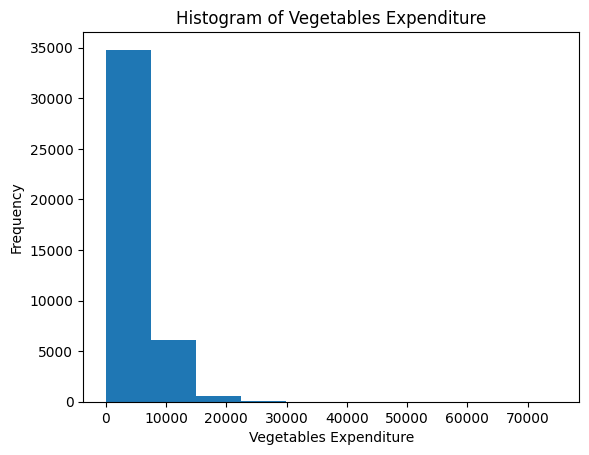

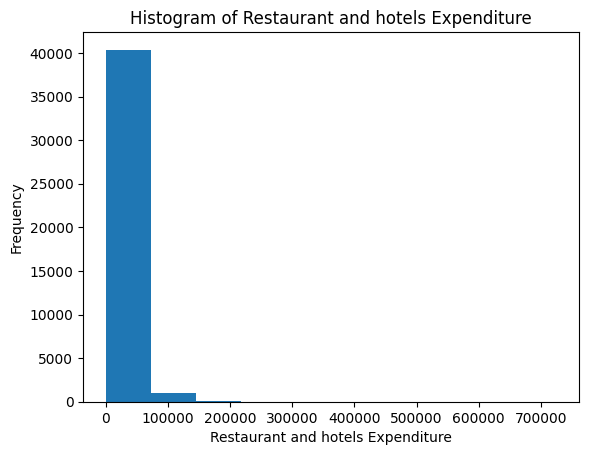

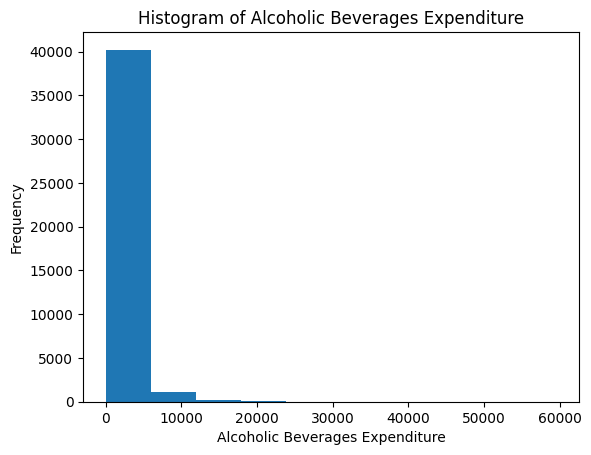

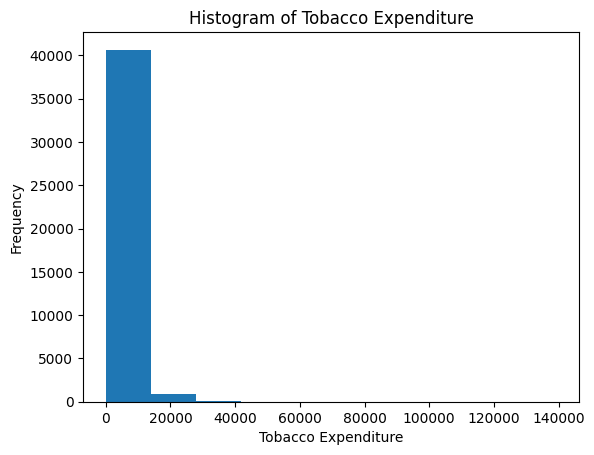

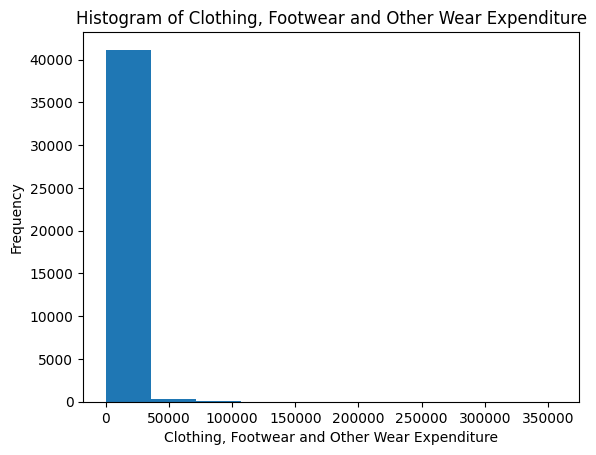

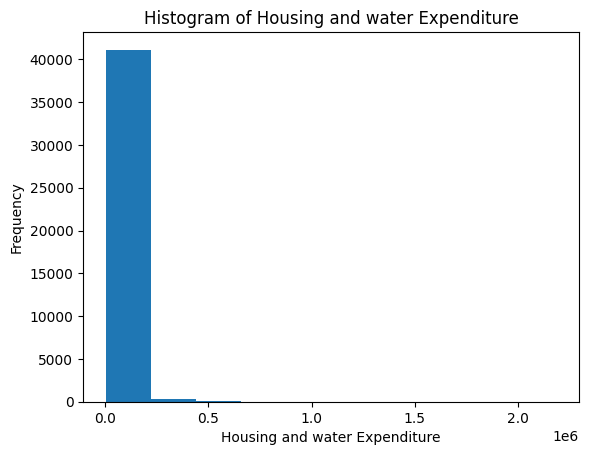

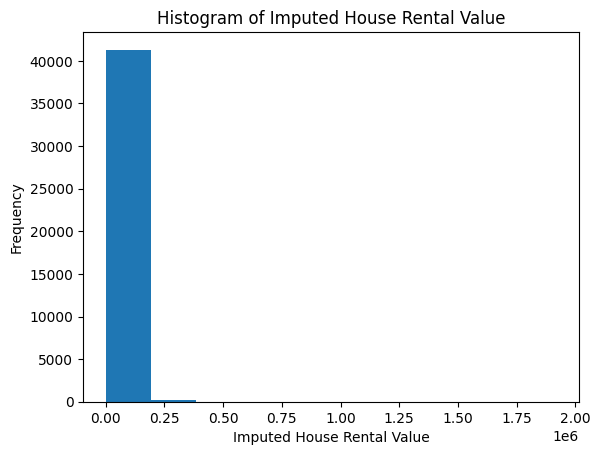

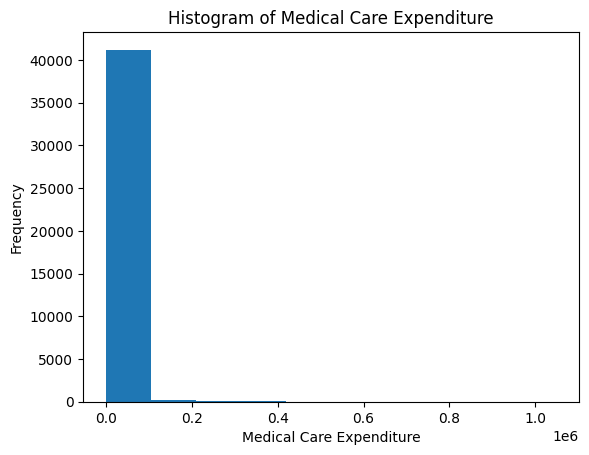

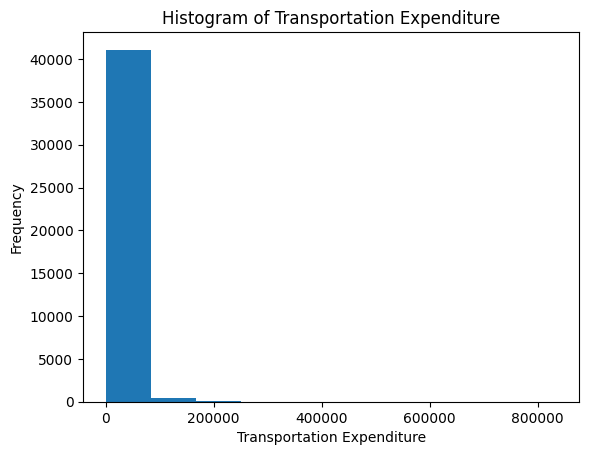

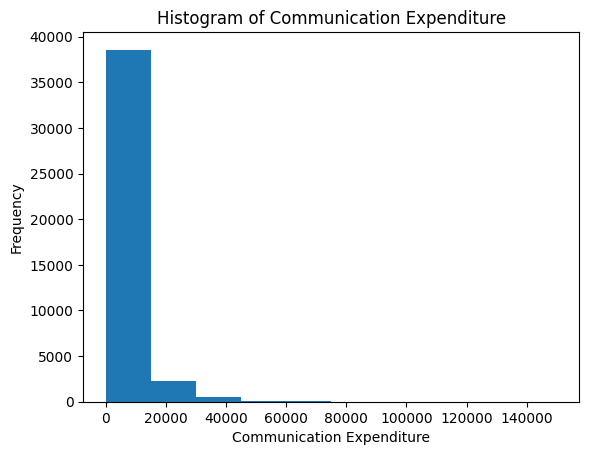

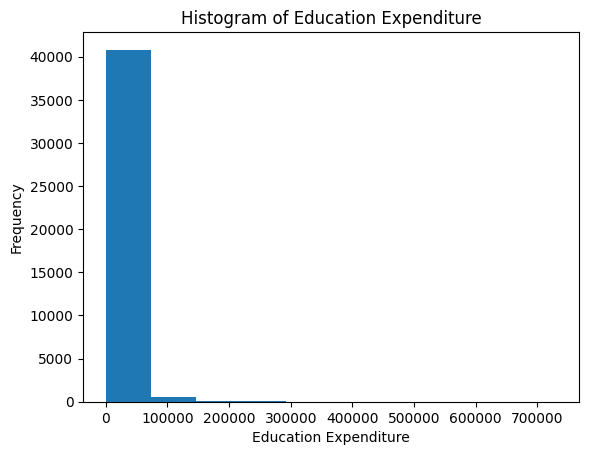

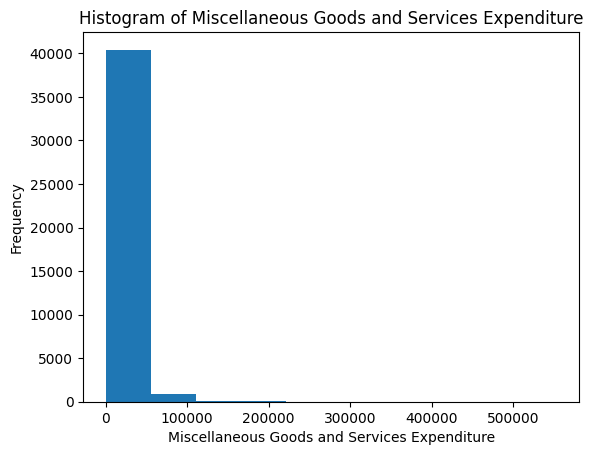

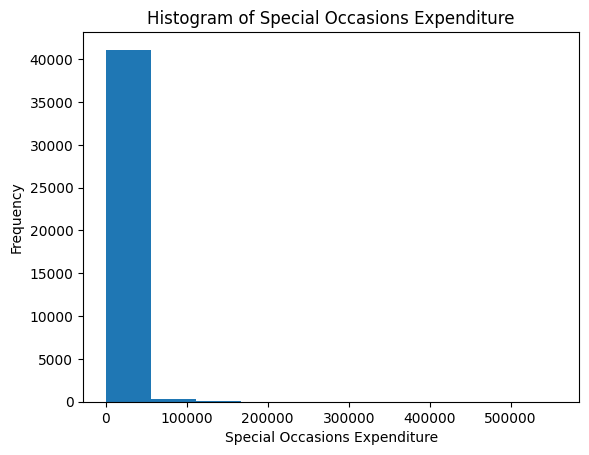

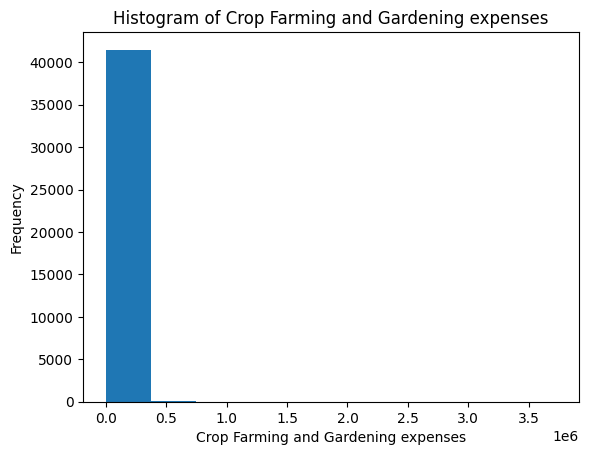

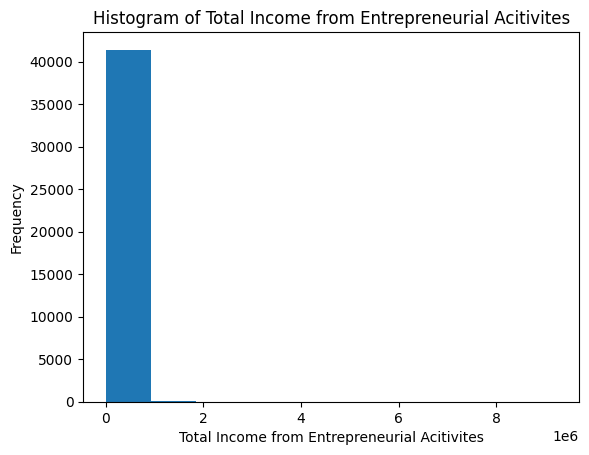

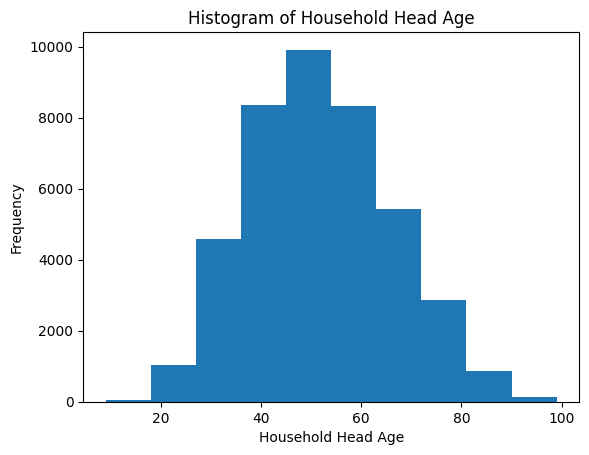

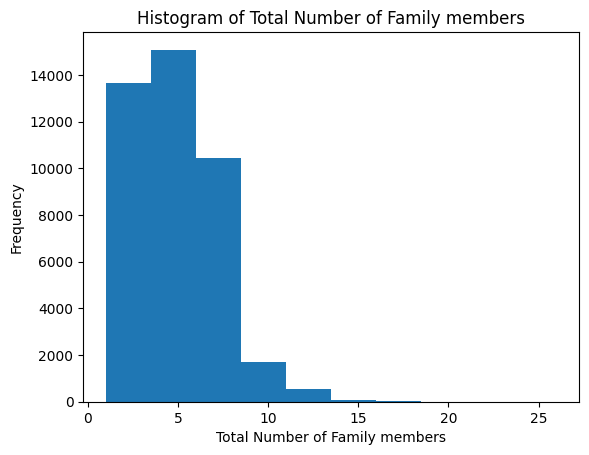

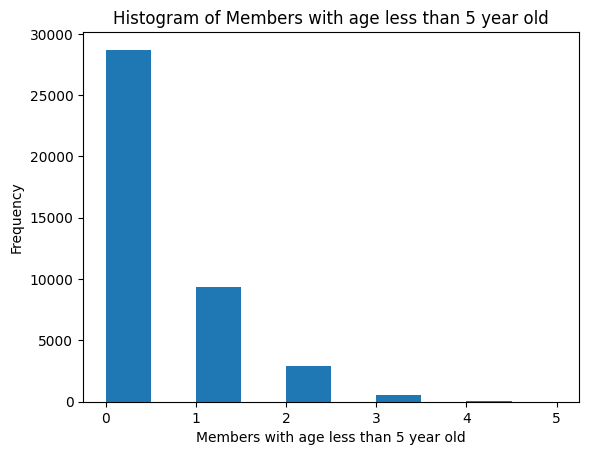

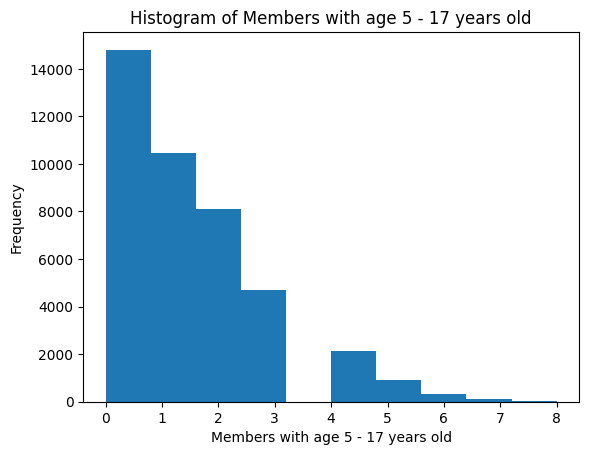

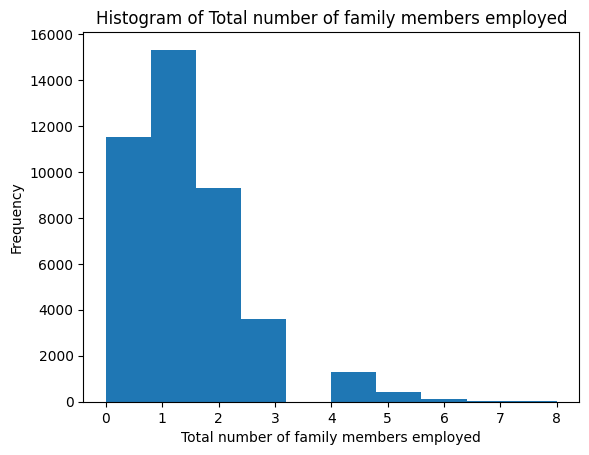

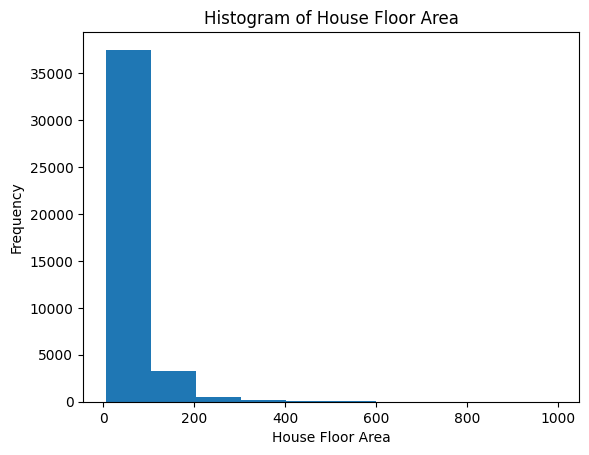

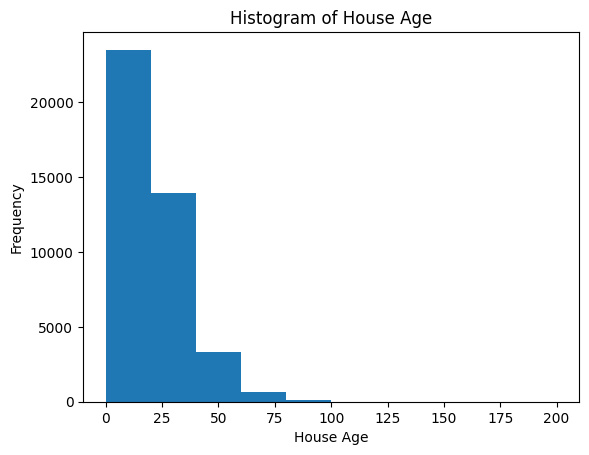

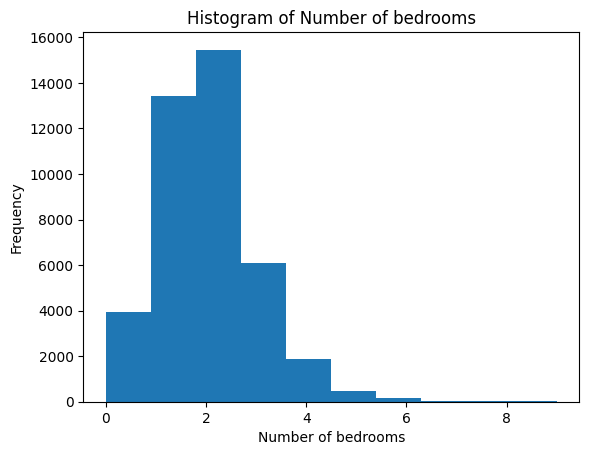

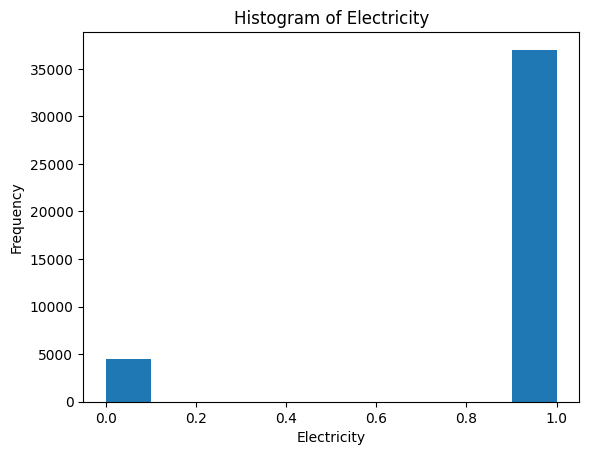

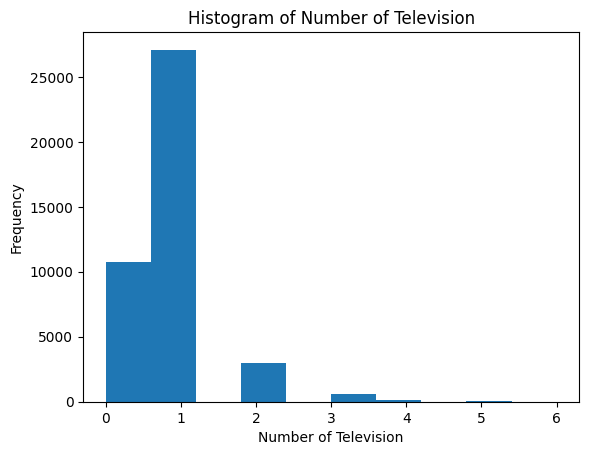

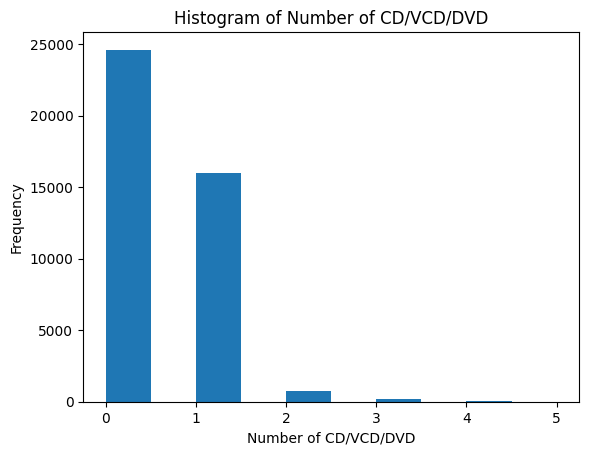

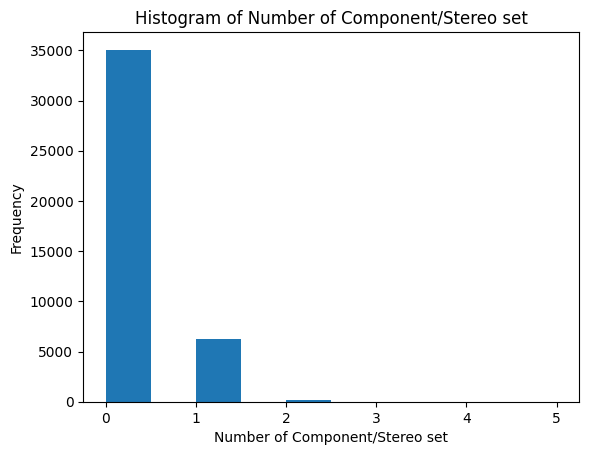

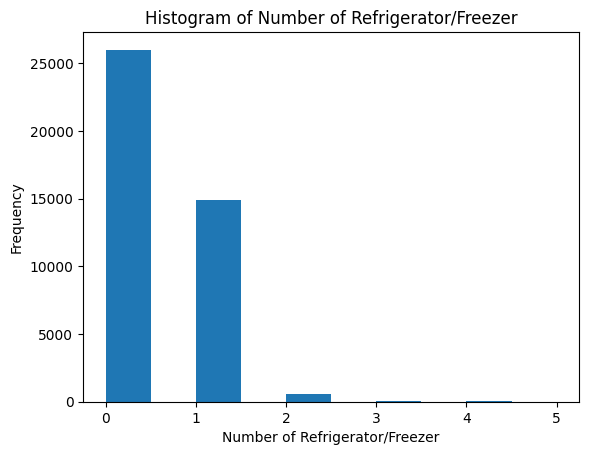

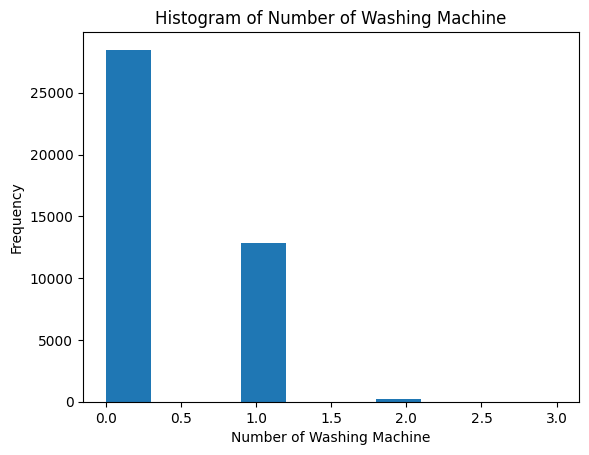

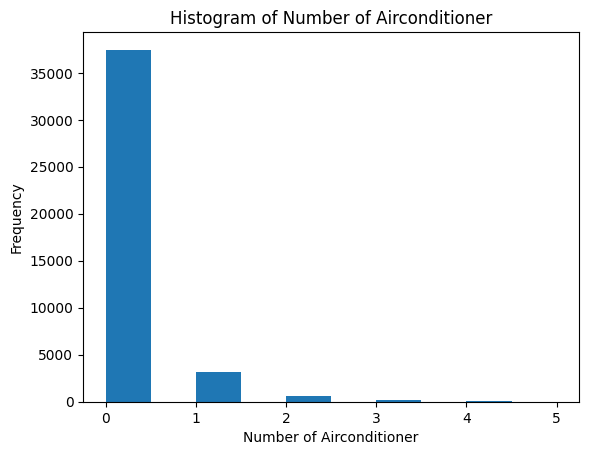

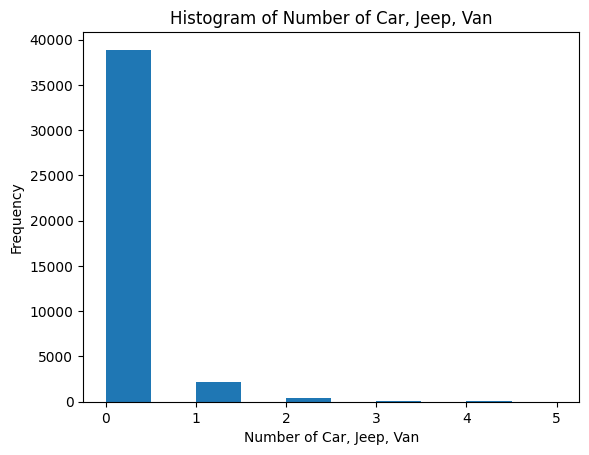

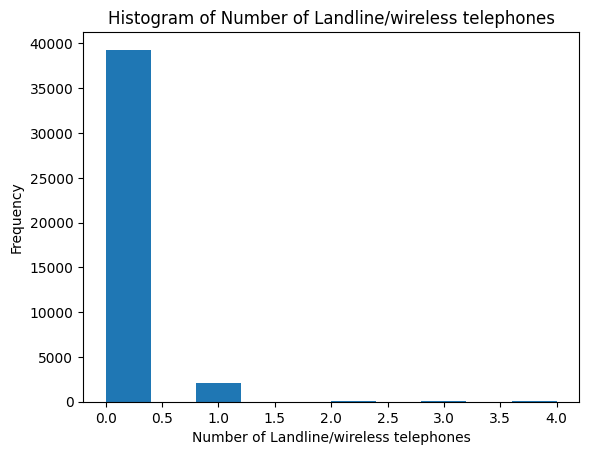

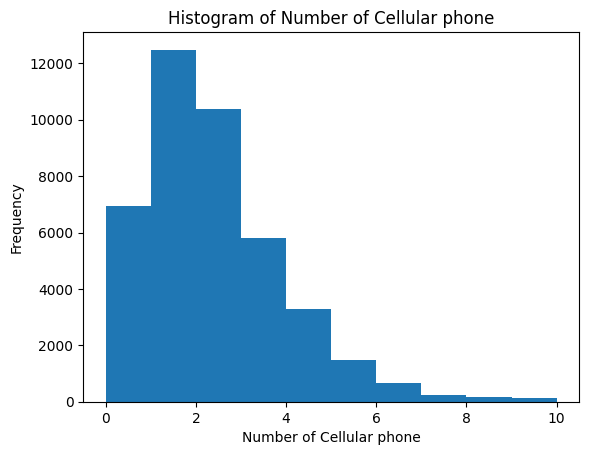

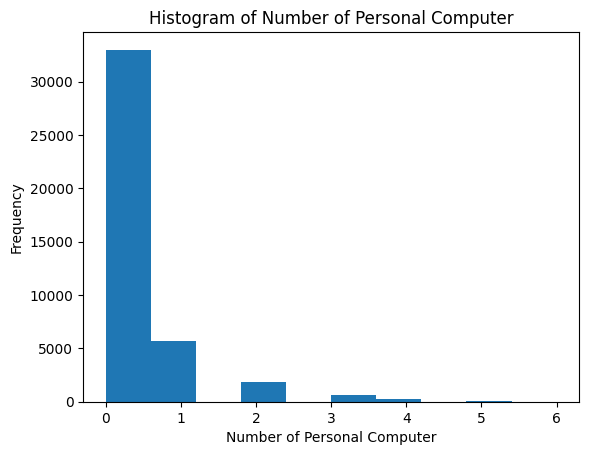

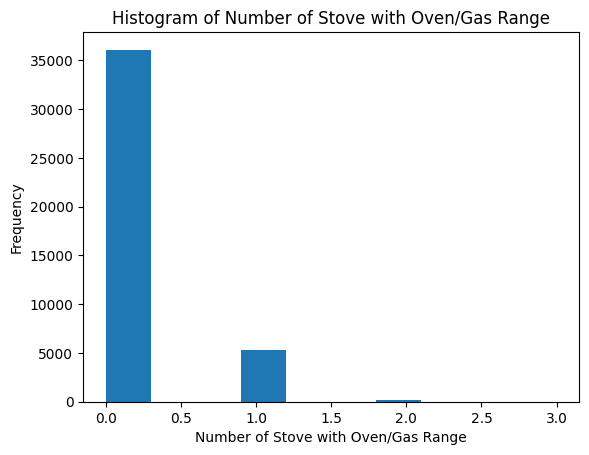

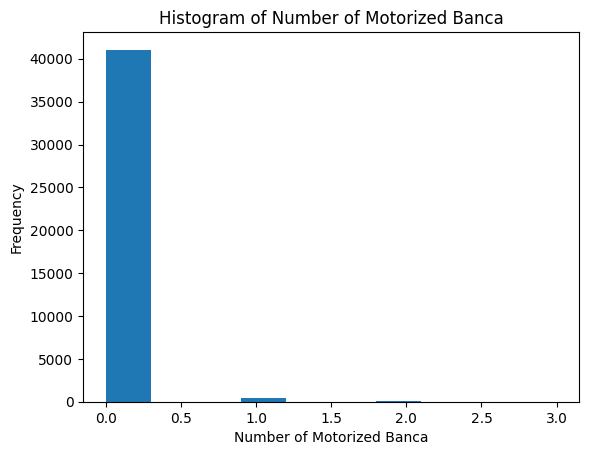

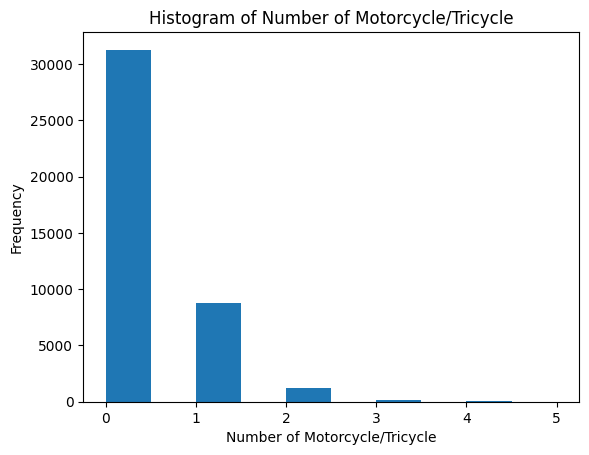

In [20]:
# Histogram for all Numerical Columns, individually
for col in numerical_columns:
    plt.hist(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
# Average Total Household Income per Region
average_income_per_region = df.groupby('Region')['Total Household Income'].mean().sort_values(ascending=False)
average_income_per_region

,Total Household Income
Region,
NCR,420861.861501
IVA - CALABARZON,303360.536040
III - Central Luzon,292965.181650
CAR,269540.484638
XI - Davao Region,238115.891251
I - Ilocos Region,238110.084327
II - Cagayan Valley,236778.221721
VII - Central Visayas,234909.314050
VI - Western Visayas,220481.260260


# Feature Engineering